<a href="https://colab.research.google.com/github/Fred66X/DS_Projects/blob/main/GettingMyStrava_Alfredo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2025 Barcelona Marathon / Fred Preparation & Insights**

**Objective of this program is to analyze my training preparation for running the 2025 marathon of barcelona, this would give me some inspiration based on what I have achieved so far to make me feel proud of my training **

# Creating your API on Strava


*   Login to your strava
*   go to profile
*   select MyAPI application


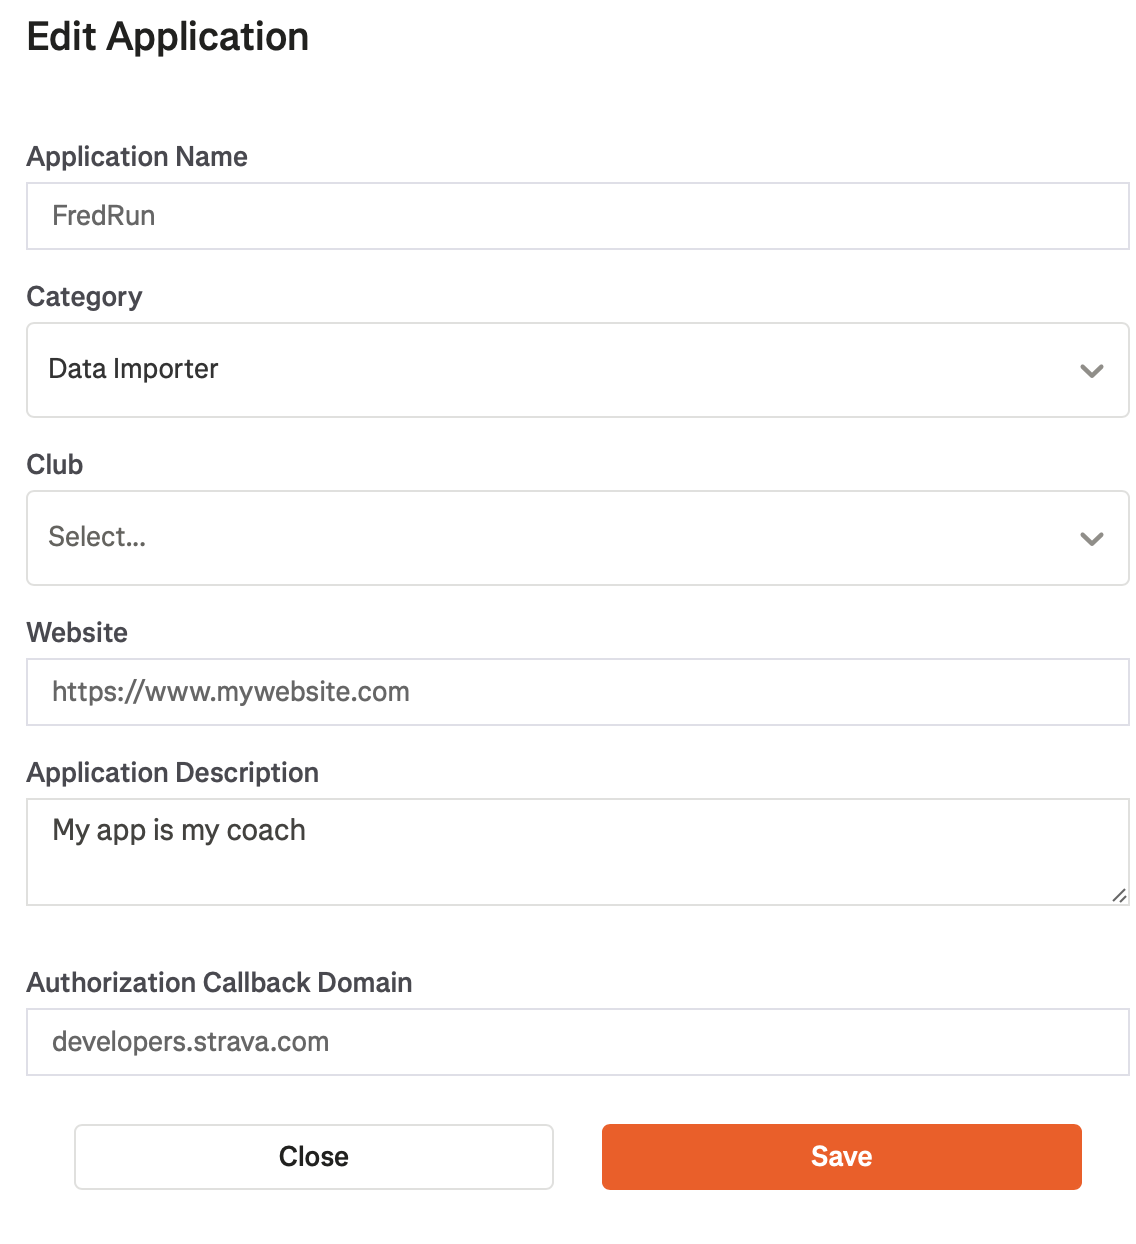



*   Then you need your CLIENT ID for the next step








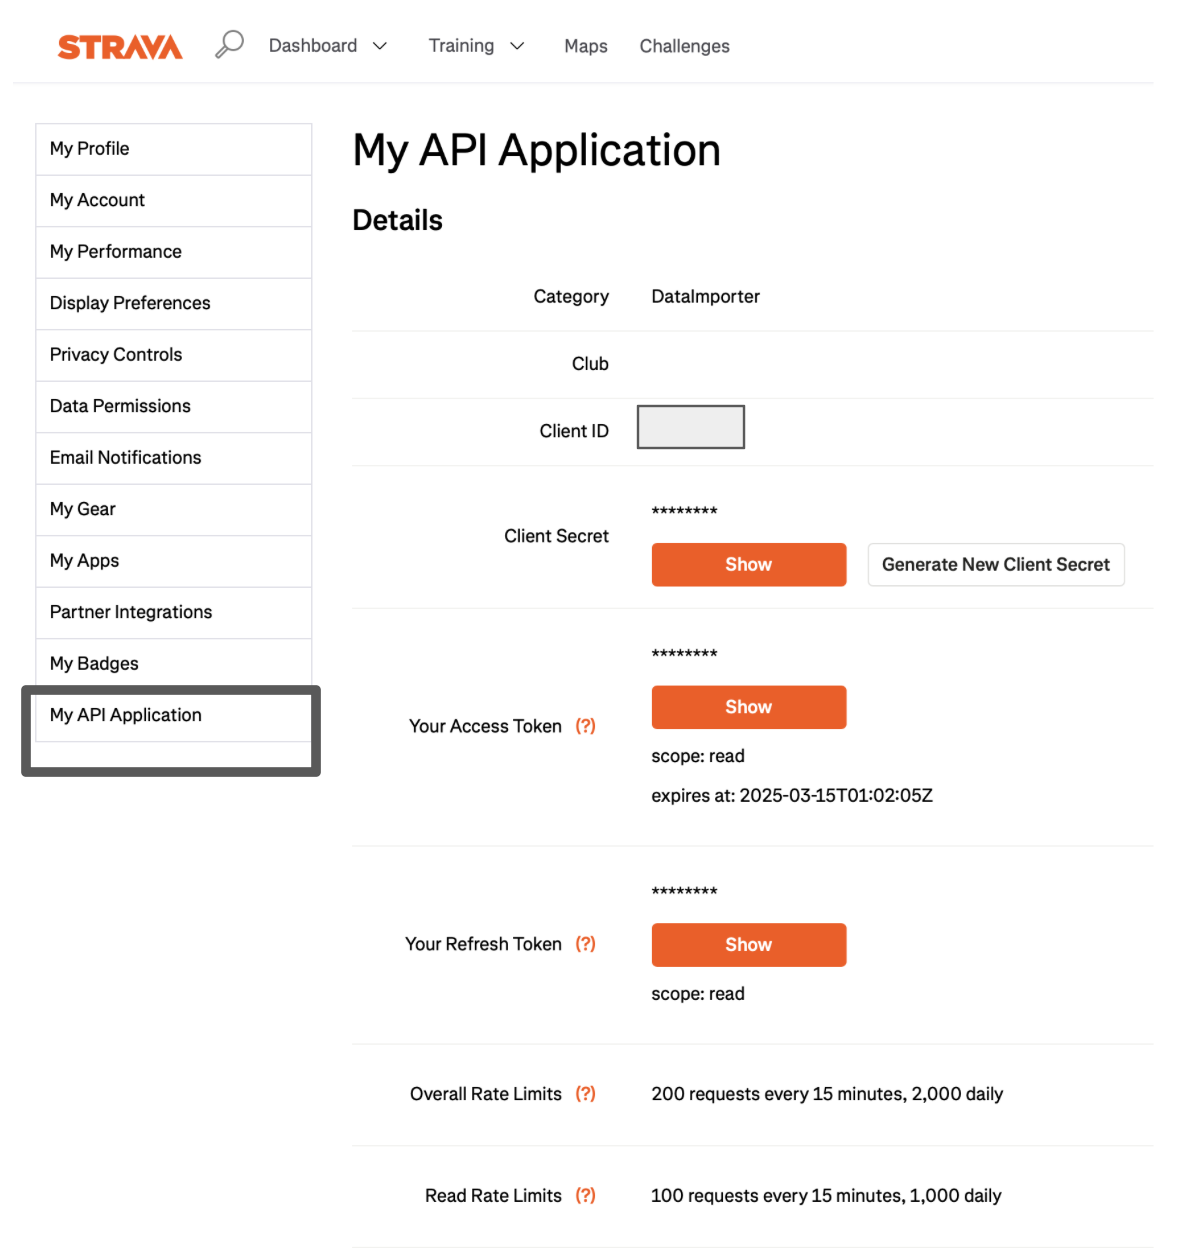

Then Copy and paste this link into your browser:
http://www.strava.com/oauth/authorize?client_id=[REPLACE_WITH_YOUR_CLIENT_ID]&response_type=code&redirect_uri=http://localhost/exchange_token&approval_prompt=force&scope=profile:read_all,activity:read_all

After clicking "Authorize" on that link, you'll be redirected to a page that won't load correctly (since we lack a real domain/website). However, that's irrelevant. What matters is copying the code from the URL you're on. The link will resemble this:
http://localhost/exchange_token?state=&code=[THIS_IS_THE_CODE_YOU_NEED_TO_COPY]&scope=read,activity:read_all,profile:read_all

okay now you are set to go just copy the codes on this code and this is where everything starts to retrieve your data

In [ ]:
#This should be an example to follow:
import requests
import json
# Make Strava auth API call with your
# client_code, client_secret and code
response = requests.post(
                    url = 'https://www.strava.com/oauth/token',
                    data = {
                            'client_id': [INSERT_CLIENT_ID_HERE],
                            'client_secret': '[INSERT_CLIENT_SECRET_KEY]',
                            'code': '[INSERT_CODE_FROM_URL_HERE]',
                            'grant_type': 'authorization_code'
                            }
                )
#Save json response as a variable
strava_tokens = response.json()
# Save tokens to file
with open('strava_tokens.json', 'w') as outfile:
    json.dump(strava_tokens, outfile)
# Open JSON file and print the file contents
# to check it's worked properly
with open('strava_tokens.json') as check:
  data = json.load(check)
print(data)

# API Callbacks to get data from Strava

In [ ]:
!pip install requests

In [ ]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "YOUR_CLIENT_ID",
    'client_secret': 'PASTE HERE YOUR SECRET CLIENT',
    'refresh_token': 'PASTE YOUR TOKEN JUST REFRESHED',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

activities_url = f"https://www.strava.com/api/v3/athlete/activities?" \
          f"access_token={access_token}"
print('RESTful API:', activities_url)

# Get the response in json format
response = requests.get(activities_url)
activity = response.json()

Requesting Token...

Access Token = 0c8aa7693b1fb460faa8d4ef824e76e6092547fe

RESTful API: https://www.strava.com/api/v3/athlete/activities?access_token=0c8aa7693b1fb460faa8d4ef824e76e6092547fe


In [ ]:
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

print(my_dataset)
#print(my_dataset[0]["name"])
#print(my_dataset[0]["map"]["summary_polyline"])

Access Token = 0c8aa7693b1fb460faa8d4ef824e76e6092547fe

{'message': 'Authorization Error', 'errors': [{'resource': 'AccessToken', 'field': 'activity:read_permission', 'code': 'missing'}]}


In [ ]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activities_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "YOUR_CLIENT_ID",
    'client_secret': "'PASTE HERE YOUR SECRET CLIENT'",
    'refresh_token': 'Replace with your new refresh token',  # Replace with your new refresh token
    'grant_type': "refresh_token",
    'f': 'json'
}

res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activities_url, headers=header, params=param).json()

print(my_dataset)

Access Token = 4b6b697387185f8078d392d1e0693751dc9441a4

[{'resource_state': 2, 'athlete': {'id': 60232332, 'resource_state': 1}, 'name': 'Happy Tapering 🤟🎵✅️ 4 days left  ...', 'distance': 6061.8, 'moving_time': 1901, 'elapsed_time': 2612, 'total_elevation_gain': 23.0, 'type': 'Run', 'sport_type': 'Run', 'workout_type': None, 'id': 13859031038, 'start_date': '2025-03-12T06:20:33Z', 'start_date_local': '2025-03-12T07:20:33Z', 'timezone': '(GMT+01:00) Europe/Madrid', 'utc_offset': 3600.0, 'location_city': None, 'location_state': None, 'location_country': None, 'achievement_count': 2, 'kudos_count': 2, 'comment_count': 0, 'athlete_count': 1, 'photo_count': 0, 'map': {'id': 'a13859031038', 'summary_polyline': 'ctp{FgveL`@KR[PMHM\\OTa@\\Wr@yADW@g@DI^i@VGZWP]PQZc@RQJQF_@HWHq@BKJEj@FJ?JCNKb@sAHCC?EQ?KDQN]l@u@Pm@Mi@g@eAG_@?YJi@Cy@l@aBCc@ESg@cAs@y@GSBI^MDEBSXcABYNI?GIc@SYGMG{@?Q@MXeADUAi@Ce@@[D_@B{@EoAH[Zk@FO@y@AiAEYa@i@UOa@OWUEoBKBEA@OEW@ICEGGI]GOCYGKKBGGMG?EEAOBEAg@[OEGIQIISm@S_@Y]GGMMIq@Oe@

# Data Pre-Processing

In [ ]:
import pandas as pd


from pandas import json_normalize

import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
activities = json_normalize(my_dataset)

In [ ]:
activities = json_normalize(my_dataset)
activities.columns
activities.shape

(169, 54)

In [ ]:
pd.set_option('display.max_columns', None)
activities.head(5)

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state
0,2,Happy Tapering 🤟🎵✅️ 4 days left ...,6061.8,1901,2612,23.0,Run,Run,NaN,13859031038,2025-03-12T06:20:33Z,2025-03-12T07:20:33Z,(GMT+01:00) Europe/Madrid,3600.0,None,None,None,2,2,0,1,0,False,False,False,False,everyone,False,None,"[41.3793, 2.163274]","[41.376396, 2.178663]",3.189,8.046,84.8,True,157.0,192.0,False,True,25.6,6.7,14792659123,14792659123,shealthec1aa7b3-eacc-4efc-afbe-8435e6b025b1.tcx,False,1,1,False,57.0,60232332,1,a13859031038,ctp{FgveL`@KR[PMHM\OTa@\Wr@yADW@g@DI^i@VGZWP]P...,2
1,2,De tranqui por el barrio #tapering 🙌,5122.1,1874,2004,15.3,Run,Run,NaN,13845074274,2025-03-10T18:12:25Z,2025-03-10T19:12:25Z,(GMT+01:00) Europe/Madrid,3600.0,None,None,None,3,1,0,1,0,False,False,False,False,everyone,False,None,"[41.381084, 2.16218]","[41.375504, 2.160958]",2.733,6.716,81.7,True,149.9,173.0,False,True,36.8,25.0,14777651838,14777651838,shealth0e39a3da-387d-4a7e-96ee-ed9707e85e07.tcx,False,0,0,False,42.0,60232332,1,a13845074274,w~p{Fm~dLVfAFJXJVVNRf@tADHLHDRJNHJNFD?LG^hA\j@...,2
2,2,Simulando KM 27 a KM 39 Maraton BCN 🔜 7 days,12122.8,4220,4319,12.1,Run,Run,NaN,13825051226,2025-03-08T14:59:33Z,2025-03-08T15:59:33Z,(GMT+01:00) Europe/Madrid,3600.0,None,None,None,17,1,1,1,0,False,False,False,False,everyone,False,None,"[41.392056, 2.190358]","[41.390358, 2.193384]",2.873,9.246,84.8,True,167.3,191.0,False,True,13.9,8.1,14755816214,14755816214,shealth9ed3f757-21e5-4efb-82e2-9ac0aa6825c3.tcx,False,3,0,False,187.0,60232332,1,a13825051226,mds{FqakLh@gAtAoAPu@fAyAr@q@|@Sj@k@Hk@P_@B_@No...,2
3,2,Afternoon Run,199.2,79,79,0.0,Run,Run,NaN,13824109465,2025-03-08T14:50:21Z,2025-03-08T15:50:21Z,(GMT+01:00) Europe/Madrid,3600.0,None,None,None,0,1,0,1,0,False,False,False,False,everyone,False,None,[],[],2.521,3.837,84.0,True,124.6,142.0,False,True,12.9,10.7,14754802626,14754802626,shealth61b592f4-f0c7-4ad1-81e5-c5f725c8f48c.tcx,False,0,0,False,0.0,60232332,1,a13824109465,,2
4,2,Cambrils Half Marathon 💪💪💪,21450.9,6836,6840,31.4,Run,Run,0.0,13766750261,2025-03-02T09:05:00Z,2025-03-02T10:05:00Z,(GMT+01:00) Europe/Madrid,3600.0,None,None,None,24,12,2,1,0,False,False,False,False,everyone,False,None,"[41.070885, 1.056356]","[41.07091, 1.057073]",3.138,4.896,89.0,True,172.3,197.0,False,True,15.6,3.8,14692616952,14692616952,shealth85c06e52-ffa4-4ad0-ba09-4ec3d0e5029f.tcx,False,12,1,False,357.0,60232332,1,a13766750261,ontyFcimE~BOp@H`DSlEEhAm@lGyAhEqBLa@?UOu@_@iAi...,2


In [ ]:
activities_1 = activities.copy()

In [ ]:
import pandas as pd


my_index = pd.Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'id', 'external_id', 'upload_id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'start_latlng', 'end_latlng', 'location_city', 'location_state',
       'location_country', 'start_latitude', 'start_longitude',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'from_accepted_tag', 'upload_id_str',
       'average_speed', 'max_speed', 'has_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'pr_count',
       'total_photo_count', 'has_kudoed', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state', 'workout_type', 'device_watts','average_heartrate','max_heartrate'],
      dtype='object')



In [ ]:

cols = ['name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'id',
       'start_date', 'start_date_local', 'timezone', 'start_latitude', 'start_longitude','start_latlng', 'end_latlng',
       'average_speed', 'max_speed', 'has_heartrate',  'elev_high', 'elev_low','type','average_heartrate','max_heartrate'
       ]

In [ ]:

common_cols = list(set(activities_1.columns) & set(cols))


activities_1 = activities_1[common_cols]

required_cols = ['start_latlng', 'end_latlng', 'start_date_local', 'average_speed', 'max_speed']
for col in required_cols:
    if col not in activities_1.columns:
        print(f"Warning: Column '{col}' is missing from the DataFrame. Skipping related operations.")
        continue


    if col == 'start_date_local':
        activities_1['start_date_local'] = pd.to_datetime(activities['start_date_local'])
        activities_1['start_time'] = activities_1['start_date_local'].dt.time
        activities_1['start_date_local'] = activities_1['start_date_local'].dt.date
    elif col == 'average_speed':
        activities_1['avg_speed_KM'] = activities_1['average_speed'] * 1.60934
    elif col == 'max_speed':
        activities_1['max_speed_KM'] = activities_1['max_speed'] * 1.60934

pd.set_option('display.max_columns', None)
activities_1.head(5)

<ipython-input-13-0017082d0ce8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_1['start_date_local'] = pd.to_datetime(activities['start_date_local'])
<ipython-input-13-0017082d0ce8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_1['start_time'] = activities_1['start_date_local'].dt.time
<ipython-input-13-0017082d0ce8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,start_date_local,has_heartrate,start_latlng,moving_time,max_speed,end_latlng,elapsed_time,id,total_elevation_gain,elev_high,name,start_date,max_heartrate,average_speed,distance,elev_low,average_heartrate,timezone,type,start_time,avg_speed_KM,max_speed_KM
0,2025-03-12,True,"[41.3793, 2.163274]",1901,8.046,"[41.376396, 2.178663]",2612,13859031038,23.0,25.6,Happy Tapering 🤟🎵✅️ 4 days left ...,2025-03-12T06:20:33Z,192.0,3.189,6061.8,6.7,157.0,(GMT+01:00) Europe/Madrid,Run,07:20:33,5.132185,12.948750
1,2025-03-10,True,"[41.381084, 2.16218]",1874,6.716,"[41.375504, 2.160958]",2004,13845074274,15.3,36.8,De tranqui por el barrio #tapering 🙌,2025-03-10T18:12:25Z,173.0,2.733,5122.1,25.0,149.9,(GMT+01:00) Europe/Madrid,Run,19:12:25,4.398326,10.808327
2,2025-03-08,True,"[41.392056, 2.190358]",4220,9.246,"[41.390358, 2.193384]",4319,13825051226,12.1,13.9,Simulando KM 27 a KM 39 Maraton BCN 🔜 7 days,2025-03-08T14:59:33Z,191.0,2.873,12122.8,8.1,167.3,(GMT+01:00) Europe/Madrid,Run,15:59:33,4.623634,14.879958
3,2025-03-08,True,[],79,3.837,[],79,13824109465,0.0,12.9,Afternoon Run,2025-03-08T14:50:21Z,142.0,2.521,199.2,10.7,124.6,(GMT+01:00) Europe/Madrid,Run,15:50:21,4.057146,6.175038
4,2025-03-02,True,"[41.070885, 1.056356]",6836,4.896,"[41.07091, 1.057073]",6840,13766750261,31.4,15.6,Cambrils Half Marathon 💪💪💪,2025-03-02T09:05:00Z,197.0,3.138,21450.9,3.8,172.3,(GMT+01:00) Europe/Madrid,Run,10:05:00,5.050109,7.879329


In [ ]:
activities_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   start_date_local      169 non-null    object 
 1   has_heartrate         169 non-null    bool   
 2   start_latlng          169 non-null    object 
 3   moving_time           169 non-null    int64  
 4   max_speed             169 non-null    float64
 5   end_latlng            169 non-null    object 
 6   elapsed_time          169 non-null    int64  
 7   id                    169 non-null    int64  
 8   total_elevation_gain  169 non-null    float64
 9   elev_high             168 non-null    float64
 10  name                  169 non-null    object 
 11  start_date            169 non-null    object 
 12  max_heartrate         123 non-null    float64
 13  average_speed         169 non-null    float64
 14  distance              169 non-null    float64
 15  elev_low              1

In [ ]:
activities_1['distance'] = activities_1['distance'] / 10

In [ ]:
activities_1.head(5)

,start_date_local,has_heartrate,start_latlng,moving_time,max_speed,end_latlng,elapsed_time,id,total_elevation_gain,elev_high,name,start_date,max_heartrate,average_speed,distance,elev_low,average_heartrate,timezone,type,start_time,avg_speed_KM,max_speed_KM,distance_group
0,2025-03-12,True,"[41.3793, 2.163274]",1901,8.046,"[41.376396, 2.178663]",2612,13859031038,23.0,25.6,Happy Tapering 🤟🎵✅️ 4 days left ...,2025-03-12T06:20:33Z,192.0,3.189,6.0618,6.7,157.0,(GMT+01:00) Europe/Madrid,Run,07:20:33,5.132185,12.948750,Marathons
1,2025-03-10,True,"[41.381084, 2.16218]",1874,6.716,"[41.375504, 2.160958]",2004,13845074274,15.3,36.8,De tranqui por el barrio #tapering 🙌,2025-03-10T18:12:25Z,173.0,2.733,5.1221,25.0,149.9,(GMT+01:00) Europe/Madrid,Run,19:12:25,4.398326,10.808327,Marathons
2,2025-03-08,True,"[41.392056, 2.190358]",4220,9.246,"[41.390358, 2.193384]",4319,13825051226,12.1,13.9,Simulando KM 27 a KM 39 Maraton BCN 🔜 7 days,2025-03-08T14:59:33Z,191.0,2.873,12.1228,8.1,167.3,(GMT+01:00) Europe/Madrid,Run,15:59:33,4.623634,14.879958,Marathons
3,2025-03-08,True,[],79,3.837,[],79,13824109465,0.0,12.9,Afternoon Run,2025-03-08T14:50:21Z,142.0,2.521,0.1992,10.7,124.6,(GMT+01:00) Europe/Madrid,Run,15:50:21,4.057146,6.175038,<5km
4,2025-03-02,True,"[41.070885, 1.056356]",6836,4.896,"[41.07091, 1.057073]",6840,13766750261,31.4,15.6,Cambrils Half Marathon 💪💪💪,2025-03-02T09:05:00Z,197.0,3.138,21.4509,3.8,172.3,(GMT+01:00) Europe/Madrid,Run,10:05:00,5.050109,7.879329,Marathons


In [ ]:
runs = activities_1.loc[activities['type'] == 'Run']

Grouping my runs by different Categories

In [ ]:
import pandas as pd

activities_1['distance_group'] = pd.cut(activities_1['distance'],
                                        bins=[0, 5, 10, 15, 21, 25,42, float('inf')],
                                        labels=['<5km', '5-10km', '10-15km', '15-21km', 'Half_Marathons','Long-Runs', 'Marathons'],
                                        include_lowest=True)

activities_1.head()

,start_date_local,has_heartrate,start_latlng,moving_time,max_speed,end_latlng,elapsed_time,id,total_elevation_gain,elev_high,name,start_date,max_heartrate,average_speed,distance,elev_low,average_heartrate,timezone,type,start_time,avg_speed_KM,max_speed_KM,distance_group
0,2025-03-12,True,"[41.3793, 2.163274]",1901,8.046,"[41.376396, 2.178663]",2612,13859031038,23.0,25.6,Happy Tapering 🤟🎵✅️ 4 days left ...,2025-03-12T06:20:33Z,192.0,3.189,6.0618,6.7,157.0,(GMT+01:00) Europe/Madrid,Run,07:20:33,5.132185,12.948750,5-10km
1,2025-03-10,True,"[41.381084, 2.16218]",1874,6.716,"[41.375504, 2.160958]",2004,13845074274,15.3,36.8,De tranqui por el barrio #tapering 🙌,2025-03-10T18:12:25Z,173.0,2.733,5.1221,25.0,149.9,(GMT+01:00) Europe/Madrid,Run,19:12:25,4.398326,10.808327,5-10km
2,2025-03-08,True,"[41.392056, 2.190358]",4220,9.246,"[41.390358, 2.193384]",4319,13825051226,12.1,13.9,Simulando KM 27 a KM 39 Maraton BCN 🔜 7 days,2025-03-08T14:59:33Z,191.0,2.873,12.1228,8.1,167.3,(GMT+01:00) Europe/Madrid,Run,15:59:33,4.623634,14.879958,10-15km
3,2025-03-08,True,[],79,3.837,[],79,13824109465,0.0,12.9,Afternoon Run,2025-03-08T14:50:21Z,142.0,2.521,0.1992,10.7,124.6,(GMT+01:00) Europe/Madrid,Run,15:50:21,4.057146,6.175038,<5km
4,2025-03-02,True,"[41.070885, 1.056356]",6836,4.896,"[41.07091, 1.057073]",6840,13766750261,31.4,15.6,Cambrils Half Marathon 💪💪💪,2025-03-02T09:05:00Z,197.0,3.138,21.4509,3.8,172.3,(GMT+01:00) Europe/Madrid,Run,10:05:00,5.050109,7.879329,Half_Marathons


# My Strava - Analysis ALL my Runs All Years!!!!

**okay with all of the data pre-processed now let's try to make some analysis !! I'm excited let's seee**

Summary of ALL my runs let's see !!

In [ ]:
activities_1['distance_group'].value_counts()

,count
distance_group,
5-10km,79
<5km,40
10-15km,29
15-21km,10
Half_Marathons,8
Long-Runs,2
Marathons,1


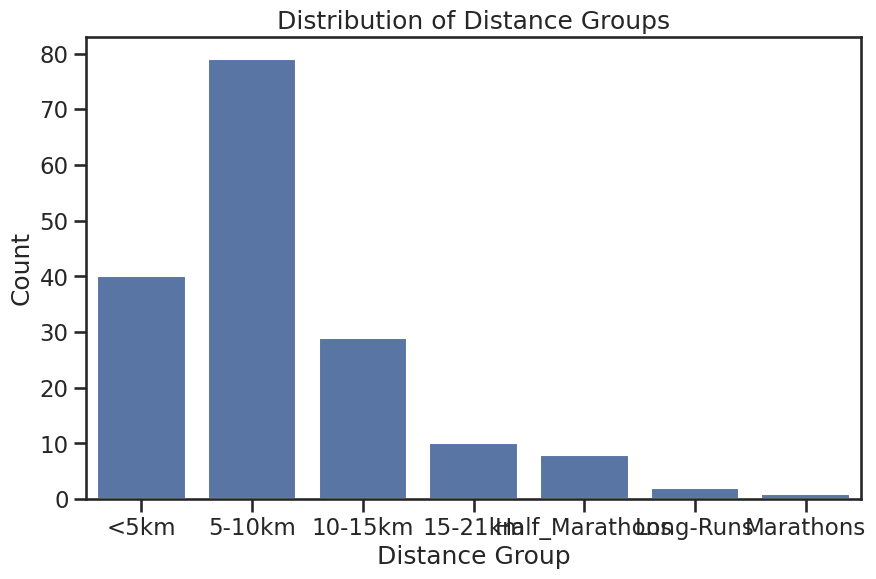

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='distance_group', data=activities_1)
plt.title('Distribution of Distance Groups')
plt.xlabel('Distance Group')
plt.ylabel('Count')
plt.show()

In [ ]:
Total_Distance = [activities_1['distance'].sum()]
print(f'Total Kilometers so far {Total_Distance}')

Total Kilometers so far [1416.1243]


In [ ]:
activities_1['start_date_local'] = pd.to_datetime(activities_1['start_date_local'])
activities_1['year'] = activities_1['start_date_local'].dt.year
total_distance_by_year = activities_1.groupby('year')['distance'].sum()
print(total_distance_by_year)

year
2020     71.3594
2021     61.5650
2022     25.5481
2023    495.5208
2024    463.7899
2025    298.3411
Name: distance, dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

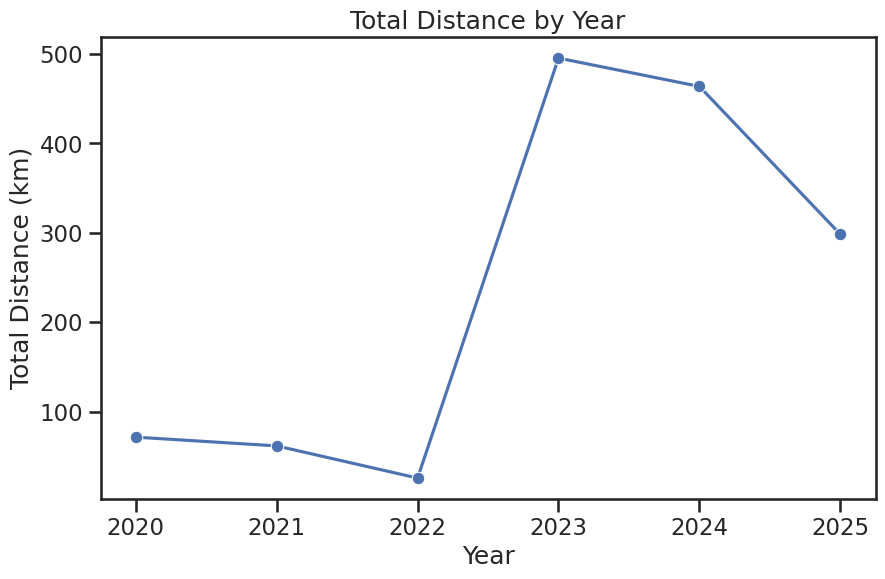

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_distance_by_year.index, y=total_distance_by_year.values, marker='o')
plt.title('Total Distance by Year')
plt.xlabel('Year')
plt.ylabel('Total Distance (km)')
plt

<ipython-input-26-f14c6feb94e6>:5: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax1.plot_date(x, y)


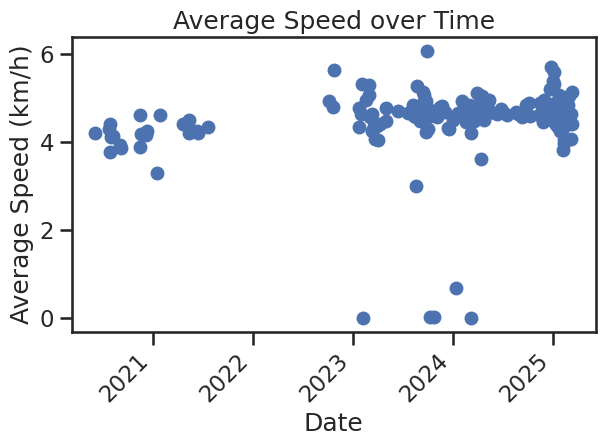

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = np.asarray(runs.start_date_local)
y = np.asarray(runs.avg_speed_KM)
ax1.plot_date(x, y)
ax1.set_title('Average Speed over Time')

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Speed (km/h)')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

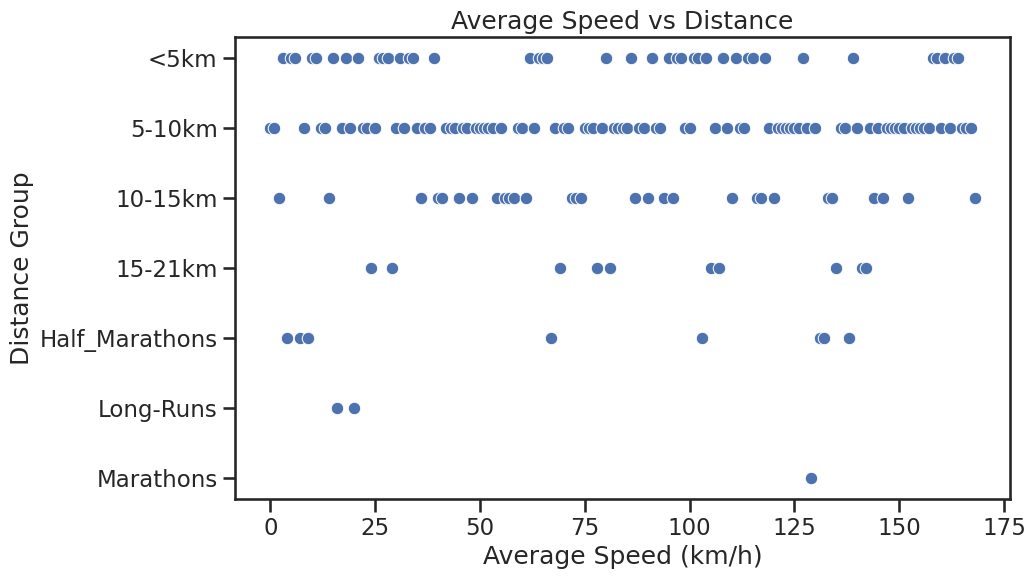

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=activities_1['avg_speed_KM'].index, y=activities_1['distance_group'], marker='o')
plt.title('Average Speed vs Distance')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Distance Group')
plt
plt

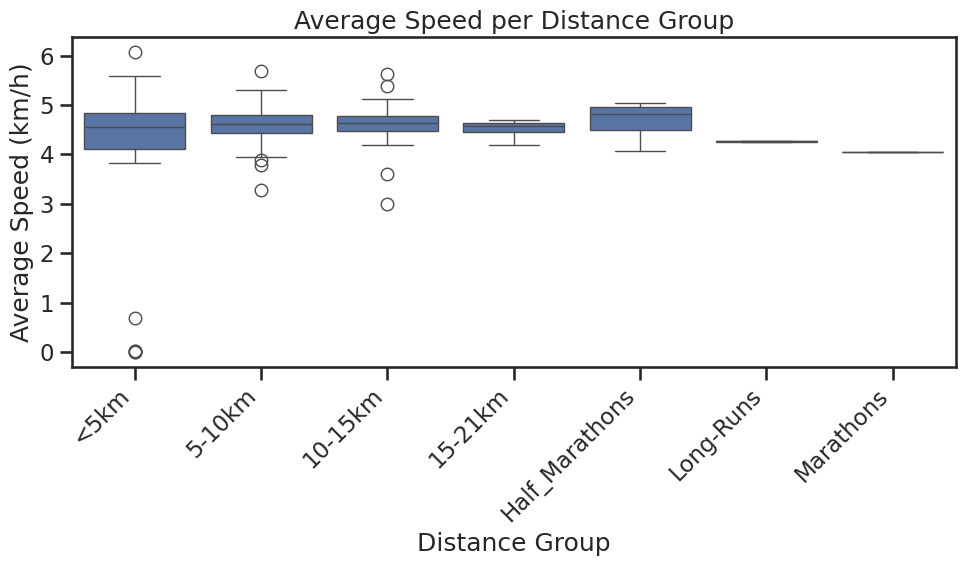

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='distance_group', y='avg_speed_KM', data=activities_1)
plt.title('Average Speed per Distance Group')
plt.xlabel('Distance Group')
plt.ylabel('Average Speed (km/h)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

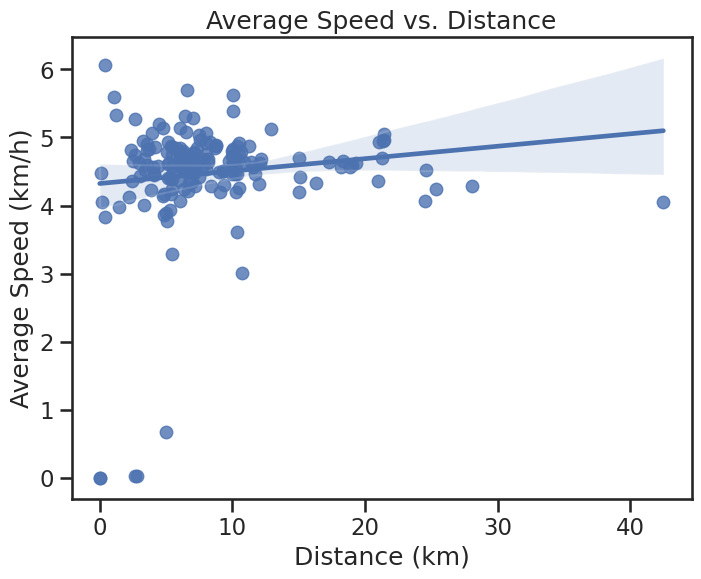

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(x='distance', y='avg_speed_KM', data=activities_1)
plt.title('Average Speed vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Average Speed (km/h)')
plt.show()

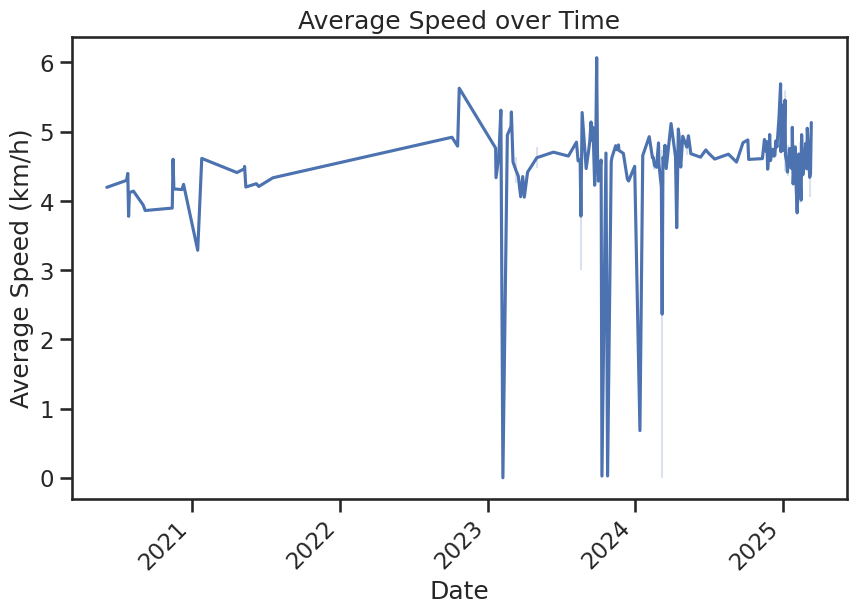

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='start_date_local', y='avg_speed_KM', data=activities_1)
plt.title('Average Speed over Time')
plt.xlabel('Date')
plt.ylabel('Average Speed (km/h)')
plt.xticks(rotation=45, ha='right')
plt.show()

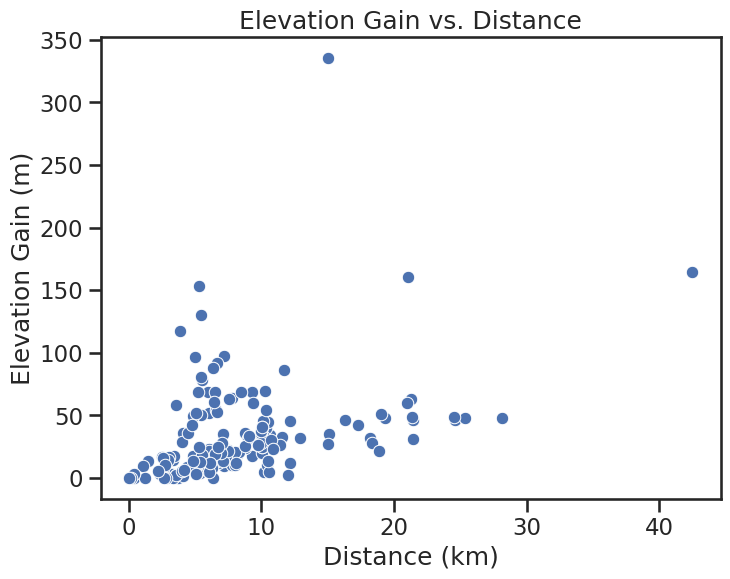

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='total_elevation_gain', data=activities_1)
plt.title('Elevation Gain vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Elevation Gain (m)')
plt.show()

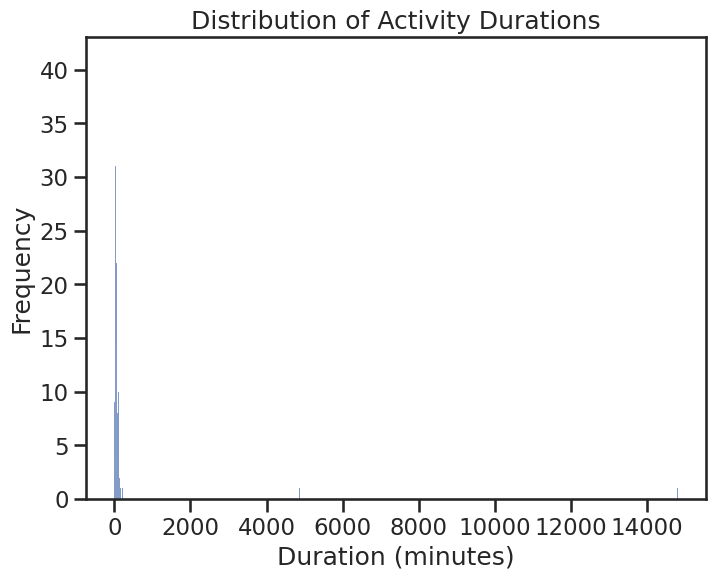

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

activities_1['elapsed_time_minutes'] = activities_1['elapsed_time'] / 60  # Convert to minutes
plt.figure(figsize=(8, 6))
sns.histplot(x='elapsed_time_minutes', data=activities_1)
plt.title('Distribution of Activity Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

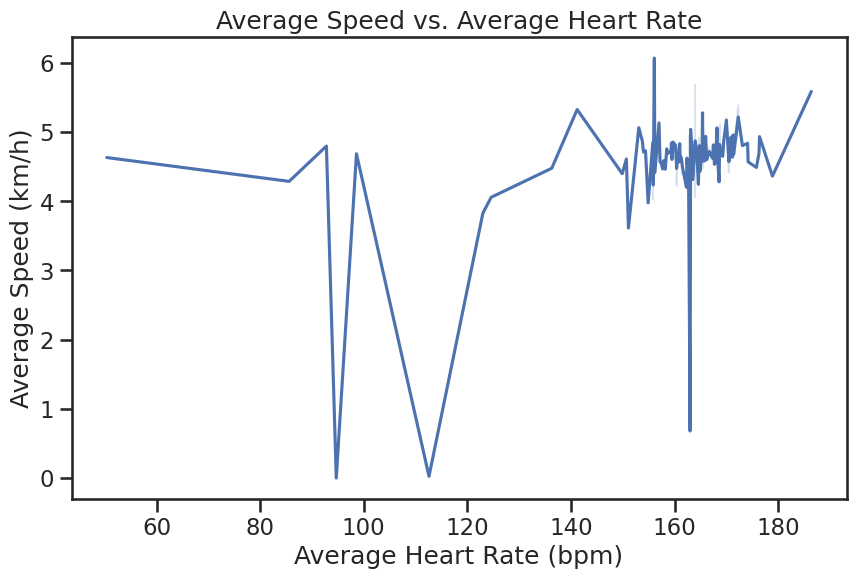

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='average_heartrate', y='avg_speed_KM', data=activities_1)
plt.title('Average Speed vs. Average Heart Rate')
plt.xlabel('Average Heart Rate (bpm)')
plt.ylabel('Average Speed (km/h)')
plt.show()
plt

**According to my heart rate I should not pass 170bpm this is my max**

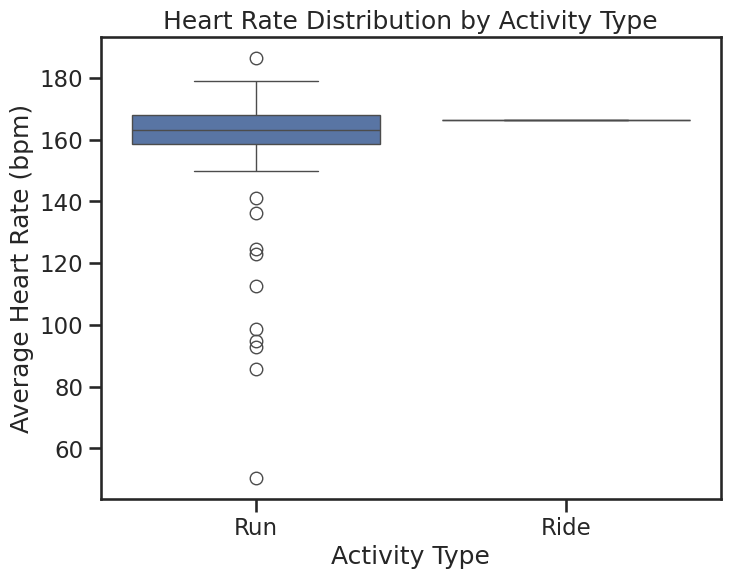

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='average_heartrate', data=activities_1[activities_1['has_heartrate'] == True])
plt.title('Heart Rate Distribution by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Average Heart Rate (bpm)')
plt.show()

In [ ]:
activities_1['rolling_avg_speed'] = activities_1['avg_speed_KM'].rolling(window=7).mean()

In [ ]:
rolling_avg_speed_by_year = activities_1.groupby('year')['rolling_avg_speed'].mean()
print(rolling_avg_speed_by_year)

year
2020    4.128205
2021    4.514505
2022    4.452124
2023    4.345081
2024    4.643878
2025    4.541282
Name: rolling_avg_speed, dtype: float64


In [ ]:
activities_1['month'] = activities_1['start_date_local'].dt.month
monthly_avg_speed = activities_1.groupby('month')['avg_speed_KM'].mean()

In [ ]:
print(monthly_avg_speed)

month
1     4.468147
2     4.381673
3     4.369205
4     4.516291
5     4.620773
6     4.454117
7     4.358093
8     4.479508
9     4.739614
10    3.843587
11    4.632083
12    4.716171
Name: avg_speed_KM, dtype: float64


Let's try to find some correlation between the relevant factors

<Axes: >

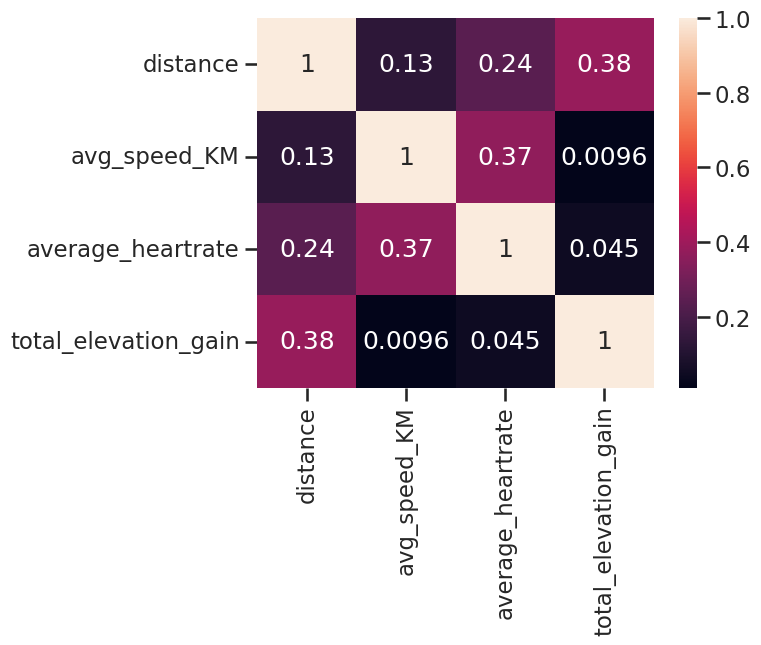

In [ ]:
correlation_matrix = activities_1[['distance', 'avg_speed_KM', 'average_heartrate', 'total_elevation_gain']].corr()
sns.heatmap(correlation_matrix, annot=True)

What if I apply some statistics, should I get something relevant?

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols(formula='avg_speed_KM ~ distance + total_elevation_gain', data=activities_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           avg_speed_KM   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.509
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.224
Time:                        10:21:43   Log-Likelihood:                -211.43
No. Observations:                 169   AIC:                             428.9
Df Residuals:                     166   BIC:                             438.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.3368 

# Map Visualization, let's see where I have been running

**by using the library of folium I would like to see visually where I have been running lately, sounds like cool ...**

In [ ]:
import folium


if 'start_latlng' in activities_1.columns and 'start_latlng' in activities_1.columns:

    start_latitudes = activities_1['start_latlng'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None).dropna()
    start_longitudes = activities_1['start_latlng'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None).dropna()


    map_center = [start_latitudes.mean(), start_longitudes.mean()]

    my_map = folium.Map(location=map_center, zoom_start=12)


    for index, row in activities_1.iterrows():

        if isinstance(row['start_latlng'], list) and len(row['start_latlng']) >= 2:
            folium.Marker(
                location=row['start_latlng'],
                popup=f"Start of {row['name']}",
                icon=folium.Icon(color='green', icon='play')
            ).add_to(my_map)


        if 'end_latlng' in activities_1.columns and isinstance(row['end_latlng'], list) and len(row['end_latlng']) >= 2:
            folium.Marker(
                location=row['end_latlng'],
                popup=f"End of {row['name']}",
                icon=folium.Icon(color='red', icon='stop')
            ).add_to(my_map)

    my_map
else:
    print("Error: 'start_latlng' or 'end_latlng' column not found in the DataFrame.")

**okay super cool ! running internationally love you Strava !!!**


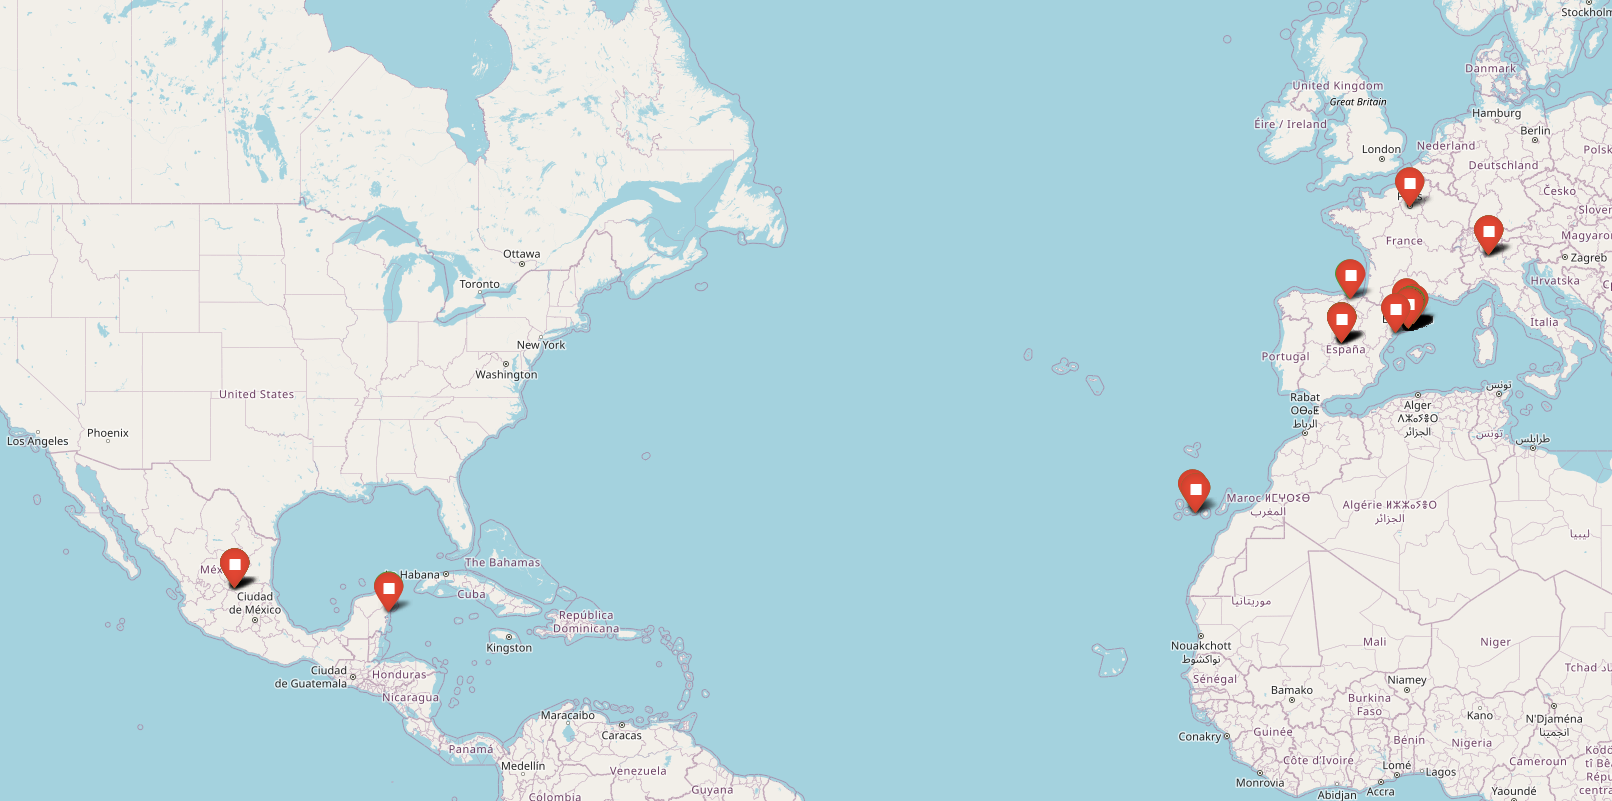

In [ ]:
my_map.save("my_strava_map.html") #printing this to visualize this

#Barcelona Marathon Preparation - Analyzing my training specifically

I paid for my ticket on November 18th 2024, this would be my first day of preparation, this is where my story begins

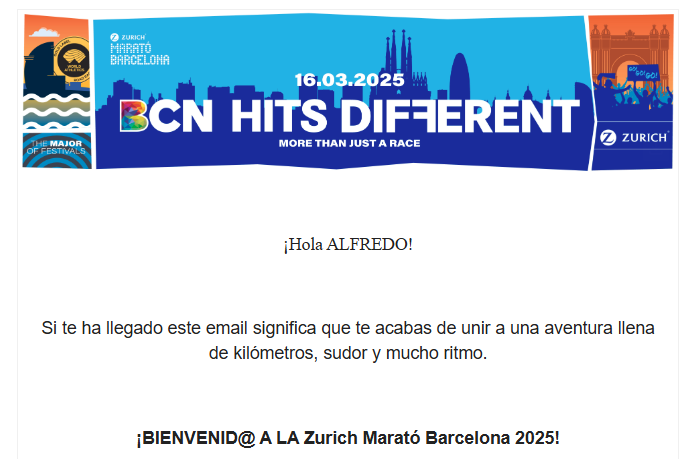

In [ ]:
bcnM = activities_1.copy()

In [ ]:
activities_1['start_date_local'] = pd.to_datetime(activities_1['start_date_local'])
bcnM = activities_1.copy()
bcnM = bcnM[bcnM['start_date_local'] >= pd.to_datetime('2024-11-18')] # this is my first day of training

**so, what did I do this training season?**

In [ ]:
bcnM['distance_group'].value_counts()

,count
distance_group,
5-10km,22
<5km,15
10-15km,7
Half_Marathons,3
15-21km,2
Long-Runs,2
Marathons,0


**How many times I went for a run this season?**

In [ ]:
bcnM['id'].count()
print(f'Freddy has run {bcnM["id"].count()} times this season')

Freddy has run 51 times this season


**Total Kilometeres achieved !!**

In [ ]:
bcnM['distance'].sum()
print(f'Freddy so far Total kilometers achieved: {bcnM["distance"].sum()}')

Freddy so far Total kilometers achieved: 415.39439999999996


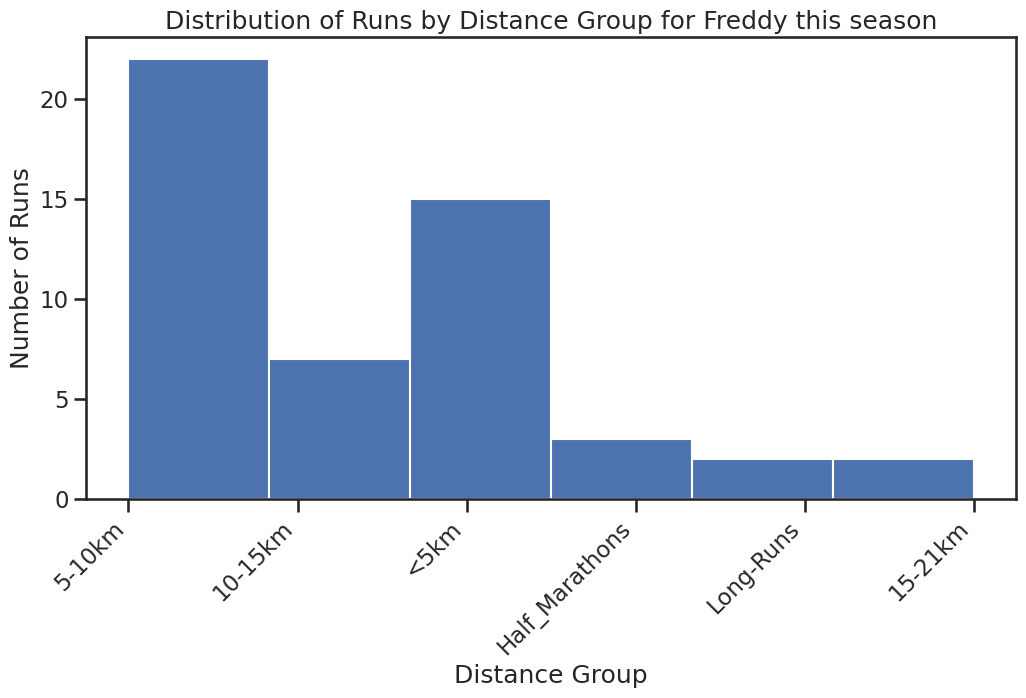

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(bcnM['distance_group'], bins=bcnM['distance_group'].nunique())
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Runs by Distance Group for Freddy this season')
plt.xlabel('Distance Group')
plt.ylabel('Number of Runs')

distance_group_labels = bcnM['distance_group'].unique()

plt.xticks(ticks=np.arange(len(distance_group_labels)), labels=distance_group_labels)

plt.show()

**Now I want to see my evolution by month based on kms achieved**

In [ ]:
bcnM['month'] = bcnM['start_date_local'].dt.month #date tranforming data type
bcnM['week'] = bcnM['start_date_local'].dt.isocalendar().week #date tranforming data type

In [ ]:
distance_by_month_bcnM = bcnM.groupby('month')['distance'].sum() #data grouping by month
distance_by_week_bcnM = bcnM.groupby('week')['distance'].sum() #data grouping by weeek

**This was my season for bcn marathon**

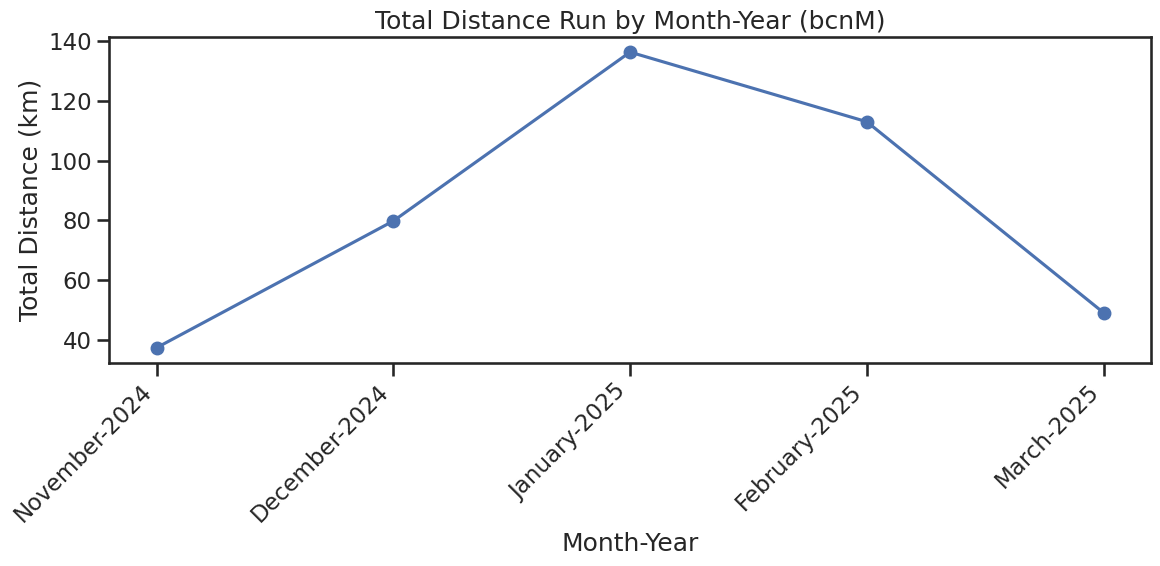

In [ ]:
import matplotlib.pyplot as plt
import calendar


bcnM['month'] = bcnM['start_date_local'].dt.month
bcnM['year'] = bcnM['start_date_local'].dt.year


monthly_distance_bcnM = bcnM.groupby(['year', 'month'])['distance'].sum().reset_index()


monthly_distance_bcnM['month_year'] = monthly_distance_bcnM['month'].apply(lambda x: calendar.month_name[x]) + '-' + monthly_distance_bcnM['year'].astype(str)


plt.figure(figsize=(12, 6))
plt.plot(monthly_distance_bcnM['month_year'], monthly_distance_bcnM['distance'], marker='o')

plt.title('Total Distance Run by Month-Year (bcnM)')
plt.xlabel('Month-Year')
plt.ylabel('Total Distance (km)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
bcnM['average_speed']

In [ ]:
avg_speed_by_group = bcnM.groupby('distance_group')['avg_speed_KM'].mean()

<ipython-input-84-9eddb28ce81b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_speed_by_group = bcnM.groupby('distance_group')['avg_speed_KM'].mean()


**This is my spread of running categories for this season**

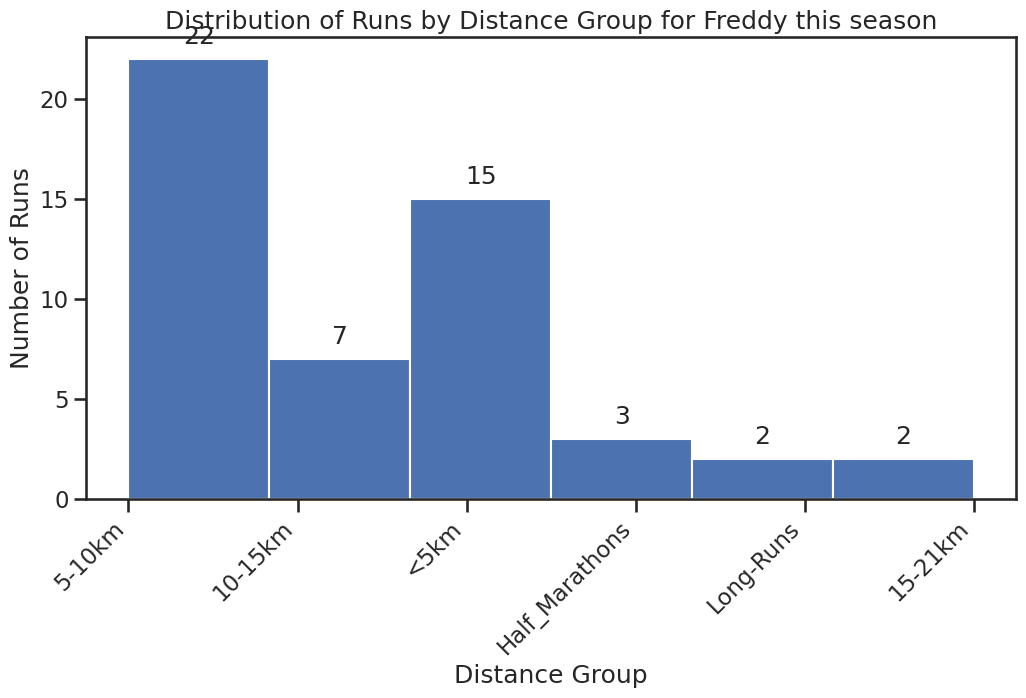

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(bcnM['distance_group'], bins=bcnM['distance_group'].nunique())
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Runs by Distance Group for Freddy this season')
plt.xlabel('Distance Group')
plt.ylabel('Number of Runs')


distance_group_labels = bcnM['distance_group'].unique()


plt.xticks(ticks=np.arange(len(distance_group_labels)), labels=distance_group_labels)


for i, count in enumerate(counts):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, count + 0.5, int(count), ha='center', va='bottom')

plt.show()

**okay now the most important !! my average speed and pace**

In [ ]:
bcnM['avg_speed_minkm'] = 60 / bcnM['avg_speed_KM']


<ipython-input-92-daffe27c38d2>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_speed_by_group = bcnM.groupby('distance_group')['avg_speed_minkm'].mean()


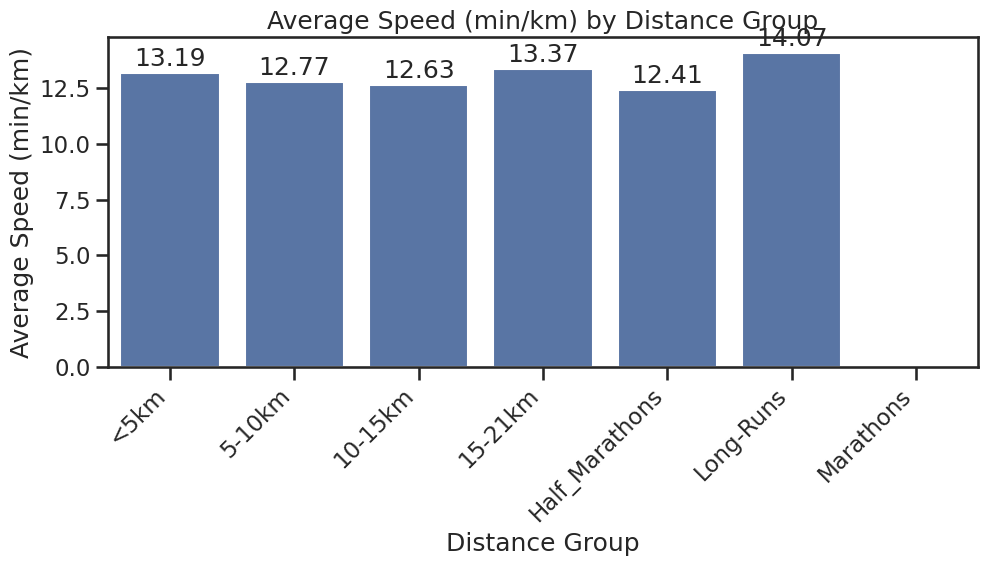

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


avg_speed_by_group = bcnM.groupby('distance_group')['avg_speed_KM'].mean()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_speed_by_group.index, y=avg_speed_by_group.values)
plt.title('Average Speed (min/km) by Distance Group')
plt.xlabel('Distance Group')
plt.ylabel('Average Speed (min/km)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Creating my Pace column

In [ ]:
import pandas as pd

def format_pace(minutes_per_km):
    minutes = int(minutes_per_km)
    seconds = int((minutes_per_km - minutes) * 60)
    return f"{minutes:02d}:{seconds:02d}"

bcnM['pace'] = bcnM['avg_speed_minkm'].apply(format_pace)

In [ ]:
bcnM.head(2)

,start_date_local,has_heartrate,start_latlng,moving_time,max_speed,end_latlng,elapsed_time,id,total_elevation_gain,elev_high,name,start_date,max_heartrate,average_speed,distance,elev_low,average_heartrate,timezone,type,start_time,avg_speed_KM,max_speed_KM,distance_group,year,elapsed_time_minutes,rolling_avg_speed,month,week,avg_speed_minkm,pace
0,2025-03-12,True,"[41.3793, 2.163274]",1901,8.046,"[41.376396, 2.178663]",2612,13859031038,23.0,25.6,Happy Tapering 🤟🎵✅️ 4 days left ...,2025-03-12T06:20:33Z,192.0,3.189,6.0618,6.7,157.0,(GMT+01:00) Europe/Madrid,Run,07:20:33,5.132185,12.948750,5-10km,2025,43.533333,NaN,3,11,11.690926,11:41
1,2025-03-10,True,"[41.381084, 2.16218]",1874,6.716,"[41.375504, 2.160958]",2004,13845074274,15.3,36.8,De tranqui por el barrio #tapering 🙌,2025-03-10T18:12:25Z,173.0,2.733,5.1221,25.0,149.9,(GMT+01:00) Europe/Madrid,Run,19:12:25,4.398326,10.808327,5-10km,2025,33.400000,NaN,3,11,13.641553,13:38


**well I'm very proud of my effort thanks to this analysis I could see visually that my training season is made of 51 runs and 415km achieved, I'm ready for next Sunday 16th really motivated to see my stats, SEE YOU AT ARC DE TRIUMPH**

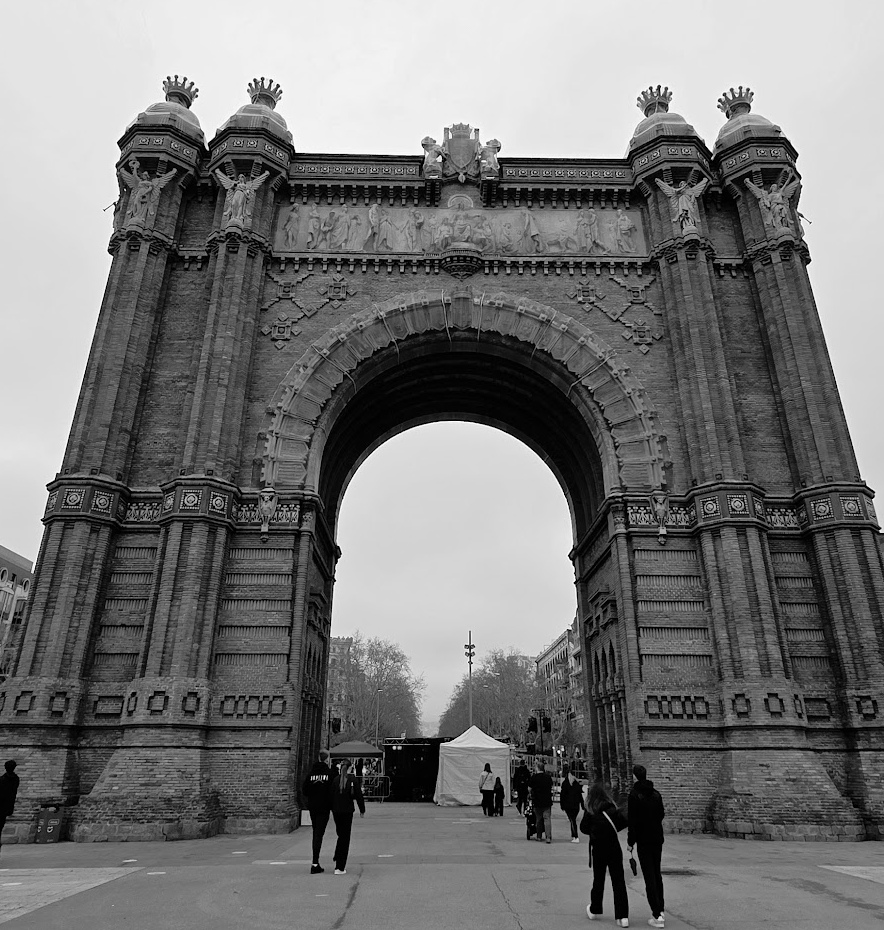